In [22]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv("./Social_Network_Ads.csv")
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [4]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25 , random_state=0)

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [28]:
print(X_train)

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

In [15]:
print(X_test)

[[-0.54748976  0.5130727 ]
 [ 0.15442019 -0.61825566]
 [-0.10879604  0.14615539]
 [-0.54748976  0.26846116]
 [-0.10879604 -0.61825566]
 [-0.81070599 -1.53554892]
 [-0.45975102 -1.68843113]
 [-0.0210573   2.25592989]
 [-1.60035469 -0.0678797 ]
 [ 0.94406888 -0.83229075]
 [-0.54748976 -0.6488321 ]
 [-0.72296725 -0.46537345]
 [ 0.06668145 -0.46537345]
 [ 0.24215893  0.20730828]
 [-1.4248772   0.48249625]
 [-0.37201227  1.43036596]
 [ 0.06668145  0.20730828]
 [-1.51261594  0.45191981]
 [ 1.64597884  1.8278597 ]
 [-0.10879604 -1.47439603]
 [-0.10879604 -0.70998498]
 [ 0.94406888  2.25592989]
 [ 0.41763642 -0.58767922]
 [ 0.94406888  1.06344865]
 [-1.16166097 -1.29093738]
 [ 1.11954637  2.16420057]
 [-0.72296725  0.5130727 ]
 [-0.63522851  0.2990376 ]
 [ 0.06668145 -0.25133835]
 [-0.37201227  0.48249625]
 [-1.33713846  0.54364914]
 [ 0.06668145  0.26846116]
 [ 1.82145632 -0.31249124]
 [ 0.06668145 -0.52652633]
 [-1.07392223 -0.37364412]
 [-1.60035469 -0.55710277]
 [-1.24939971  0.32961404]
 

In [6]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion="entropy",  random_state= 0)
dt.fit(X_train , y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
print(dt.predict(sc.transform([[30,87000]])))

[0]


In [9]:
y_pred = dt.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 1 1]


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61  7]
 [ 3 29]]


0.9

In [11]:
from sklearn.tree import export_text

text_repr = export_text(dt)
print(text_repr)

|--- feature_0 <= 0.63
|   |--- feature_1 <= 0.61
|   |   |--- feature_0 <= -0.16
|   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.16
|   |   |   |--- feature_1 <= -0.06
|   |   |   |   |--- class: 0
|   |   |   |--- feature_1 >  -0.06
|   |   |   |   |--- feature_1 <= 0.40
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  0.03
|   |   |   |   |   |   |--- feature_1 <= 0.26
|   |   |   |   |   |   |   |--- feature_1 <= 0.08
|   |   |   |   |   |   |   |   |--- feature_0 <= 0.14
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_0 >  0.14
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.06
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.24
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   

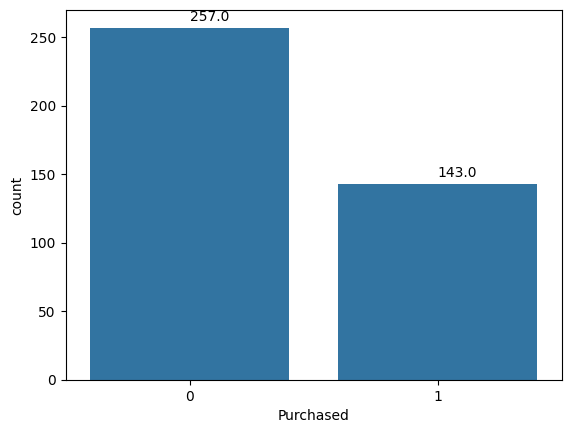

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(x='Purchased', data=data)

for p in ax.patches:
    height = p.get_height()
    ax.text(x=p.get_x()+ (p.get_width()/2),
           y= height+5,
           s=height)
plt.show()

32
[0, 100]


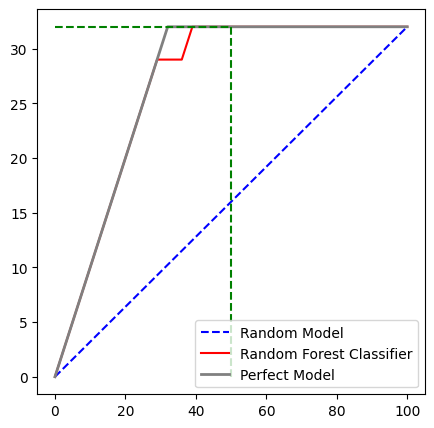

In [60]:
#plotting
total = len(y_test)

#counting 1 lables in test data
one_count = np.sum(y_test)

print(one_count)

#counting 0 lables
zero_count = total - one_count

#model plotting
# Your question might be whire are we taking actual prediction in lm y compression for random forest line 
# Actually it tells how many data points of predicted 1(purchased) is correctly predicted such that we reach the maximum possible total purchasse
# Here in graph you can see somewhere arounf 29 model predicted 1 but it was actually 0 so it stagnates there . 

# when we sort all the 1,1 will be shown first then all teh 1,0 , then 0,1 and final 0,0
# 1,1 will increase the plot along with the one_count (linearly)
# 1,0 says will miss predicted a 0 for 1 and this 1 will come later as its sorted . Hence graph stagnates 
# then 0 , 1 which is false negative . The 1 lost before gets appended now and the graph goes backk up 
#  at the point we have reached max customer and 0,0 stagnates the graph as expected 
# so faster we reach the max customer , the better the preduiction was as the errors was naturally less 

lm = [y for _,y in sorted(zip(y_pred,y_test), reverse=True)]
x = np.arange(0, total+1)
y = np.append([0], np.cumsum(lm))

plt.figure(figsize = (5, 5))
print([0,total])

# linearly increase upto maximum possibel pruchase count (all 1 count) . X axis is total customer
plt.plot([0,total], [0,one_count], c='b', linestyle='--', label='Random Model')

plt.plot(x,y, c='r', label = 'Random Forest Classifier')

# shoots straight to max at one count . meaning every prediction was nailed 
plt.plot([0, one_count, total], [0, one_count, one_count],
         c = 'grey', linewidth = 2, label = 'Perfect Model')
# Point where vertical line will cut trained model
index = int((50*total / 100))

# ## 50% Verticcal line from x-axis
plt.plot([index, index], [0, y[index]], c ='g', linestyle = '--')

# ## Horizontal line to y-axis from prediction model
plt.plot([0, index], [y[index], y[index]], c = 'g', linestyle = '--')

class_1_observed = y[index] * 100 / max(y)

plt.legend()
plt.show()


In [61]:
from sklearn.metrics import auc
# Area under Random Model
a = auc([0, total], [0, one_count])

# Area between Perfect and Random Model
aP = auc([0, one_count, total], [0, one_count, one_count]) - a

# Area between Trained and Random Model
aR = auc(x, y) - a

print("Accuracy Rate for Random Forest Classifier: {}".format(aR / aP))

Accuracy Rate for Random Forest Classifier: 0.9806985294117647
